In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency, pointbiserialr, f_oneway

from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None) # to display all columns in a dataframe
pd.set_option('display.max_rows', None)

Data Preprocessing:

In [3]:
df=pd.read_csv('Dataset/top_10_stock_data.csv')
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000


C:\Users\omara\AppData\Local\Temp\ipykernel_32424\1418184802.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = group.set_index('Date').resample('M').mean(numeric_only=True)


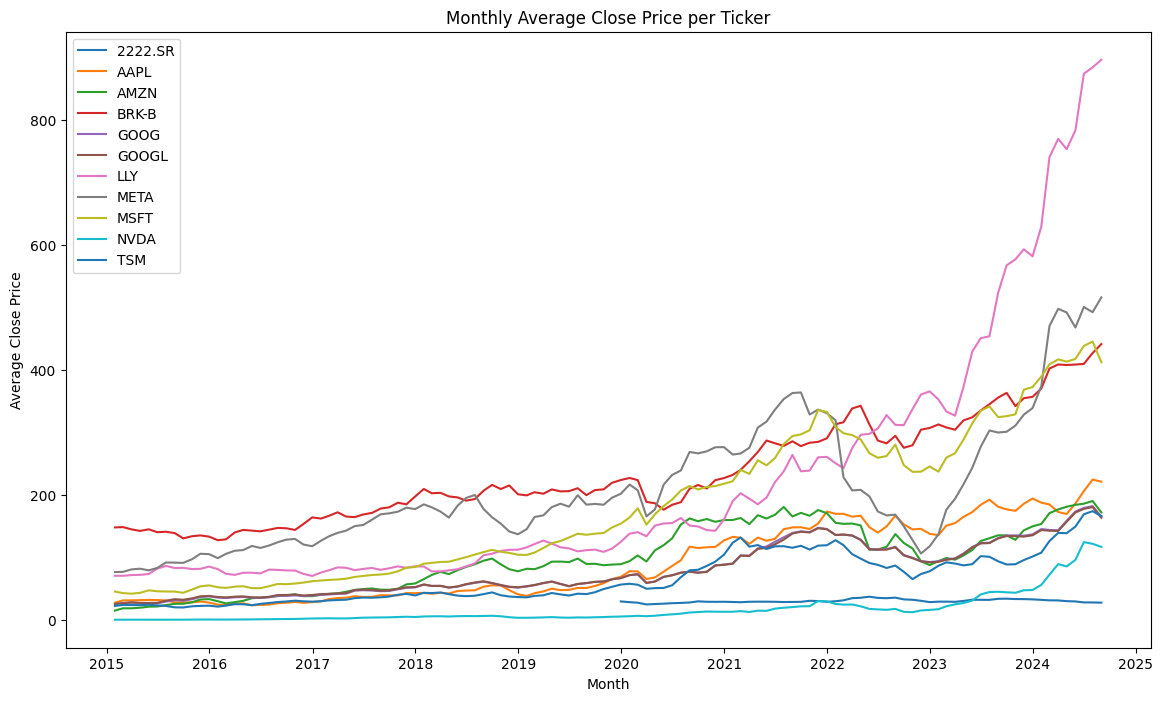

In [10]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plot
plt.figure(figsize=(14, 8))

# Group by Ticker and resample monthly, then plot
for ticker, group in df.groupby('Ticker'):
    monthly = group.set_index('Date').resample('M').mean(numeric_only=True)
    plt.plot(monthly.index, monthly['Close'], label=ticker)

plt.title('Monthly Average Close Price per Ticker')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

To better clean the CSV, we need to convert the 'Date" to datetime format and sort values for each company

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by=['Ticker', 'Date'], inplace=True)
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
14586,2019-12-11,2222.SR,29.090908,29.090908,29.090908,29.090908,24.935045,38289394
14587,2019-12-12,2222.SR,31.983471,31.983471,29.752066,30.413223,26.068457,505692621
14588,2019-12-15,2222.SR,30.661158,30.991735,30.413223,30.909090,26.493484,98349281
14589,2019-12-16,2222.SR,30.991735,31.487602,30.991735,31.404959,26.918514,105973907
14590,2019-12-17,2222.SR,31.446280,31.528925,30.991735,31.198347,26.741415,142672245
